## 1.1 Imports<a id='1.1_Imports'></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 2.1 Data<a id='2.1_Data'></a>

In [2]:
ped_crash = pd.read_csv('raw_data/NCDOT_BikePedCrash.csv')
bike_crash = pd.read_csv('raw_data/NCDOT_BikeCrash.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (16,30,31,32,33,34,35,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ped_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33707 entries, 0 to 33706
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           33707 non-null  float64
 1   Y           33707 non-null  float64
 2   OBJECTID    33707 non-null  int64  
 3   AmbulanceR  33707 non-null  object 
 4   City        33707 non-null  object 
 5   County      33707 non-null  object 
 6   CrashAlcoh  33707 non-null  object 
 7   CrashDay    33707 non-null  object 
 8   CrashGrp    33707 non-null  object 
 9   CrashHour   33707 non-null  int64  
 10  CrashLoc    33707 non-null  object 
 11  CrashMonth  33707 non-null  object 
 12  CrashSevr   33707 non-null  object 
 13  CrashType   33707 non-null  object 
 14  CrashYear   33707 non-null  int64  
 15  Developmen  33707 non-null  object 
 16  DrvrAge     33707 non-null  object 
 17  DrvrAgeGrp  33707 non-null  object 
 18  DrvrAlcDrg  33707 non-null  object 
 19  DrvrAlcFlg  33707 non-nul

In [4]:
bike_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11266 entries, 0 to 11265
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           11266 non-null  float64
 1   Y           11266 non-null  float64
 2   OBJECTID    11266 non-null  int64  
 3   AmbulanceR  11266 non-null  object 
 4   BikeAge     11266 non-null  object 
 5   BikeAgeGrp  11266 non-null  object 
 6   BikeAlcDrg  11266 non-null  object 
 7   BikeAlcFlg  11266 non-null  object 
 8   BikeDir     11266 non-null  object 
 9   BikeInjury  11266 non-null  object 
 10  BikePos     11266 non-null  object 
 11  BikeRace    11266 non-null  object 
 12  BikeSex     11266 non-null  object 
 13  City        11266 non-null  object 
 14  County      11266 non-null  object 
 15  CrashAlcoh  11266 non-null  object 
 16  CrashDay    11266 non-null  object 
 17  CrashGrp    11266 non-null  object 
 18  CrashHour   11266 non-null  int64  
 19  CrashLoc    11266 non-nul

**Full Category Name** 
County, City, Crash Date, Crash Day, Crash Group, Crash Location, Crash Time, Crash Severity, Bike/Pedestrian Age Group, Bike/Pedestrian Alcohol Detected, Bike Direction, Bike/Pedestrian Injury, Bike/Pedestrian Position, Bike/Pedestrian Race, Bike/Pedestrian Sex, Ambulance Response, Driver Age Group, Driver Estimated Speed, Speed Limit, Driver Alcohol Detected, Driver Injury, Driver Race, Driver Sex, Driver Vehicle Type, Hit and Run, Development, Light Condition, Locality, Number of Lanes, Road Characteristics/Class/Condition/Configuration, Road Defects/Features, Traffic Control, Crash Type, and/or Weather. 

**From Source**
Crash locations are often specified to only the nearest 0.10 mile. It is further likely that many of the locations in crash data are estimated rather than resulting from an actual measurement at the crash scene.

**Commentary**
Most of the data are object data. The numerical data are generally coordinates. NumUnits appears to describe the number of people involved? It should probably be category data.
An important thing to determine is whether or not there are duplicates between the bike crash and ped crash data sets.

There are seemingly no null values in either data set.

Getting an idea of what the data contain

In [83]:
def object_summary(data_set, n = 5):
    for column in data_set.select_dtypes('object'):
        print(str(column))
        print(data_set.select_dtypes('object')[column].value_counts().head(n))
        print()

In [6]:
object_summary(bike_crash)

AmbulanceR
Yes    7656
No     3610
Name: AmbulanceR, dtype: int64

BikeAge
20    354
18    322
14    321
15    314
21    295
Name: BikeAge, dtype: int64

BikeAgeGrp
50-59    1599
40-49    1588
20-24    1392
30-39    1327
11-15    1320
Name: BikeAgeGrp, dtype: int64

BikeAlcDrg
No                                   7493
.                                    2830
Yes-Alcohol, impairment suspected     357
Missing                               253
Unknown                               233
Name: BikeAlcDrg, dtype: int64

BikeAlcFlg
No         10115
Yes          648
Missing      270
Unknown      233
Name: BikeAlcFlg, dtype: int64

BikeDir
With Traffic      6780
Facing Traffic    2731
Not Applicable    1315
Unknown            440
Name: BikeDir, dtype: int64

BikeInjury
B: Suspected Minor Injury      4660
C: Possible Injury             4338
O: No Injury                   1102
A: Suspected Serious Injury     577
Unknown Injury                  339
Name: BikeInjury, dtype: int64

BikePos
Travel La

**Questions/Comments from summary data**

What does "." mean in BikeAlcDrg? There's a No option and a missing option.
BikeAlcFlg?

For Bike Race Data, how does this compare to the demographics of the state?

For City/County data, how well does this correlate with population? Is it 1:1? Do more urban areas have a higher per capita crash rate than rural ones?

Days of the week seem to be somewhat flat.

Is CrashSevr (crash severity) random or are there more prone groups/areas?

DrivrAge max value is 999 - likely an indicator for unknown age. Matches 1:! with the Unknown age group with 1540 entries.

Do hit and runs occurr at any special times/places/conditions?
LightCond is useful because it decouples seasonal sunrise/sunset from time -- I don't have to lookup those values
What are the NumBics data???



In [7]:
object_summary(ped_crash)

AmbulanceR
Yes    24223
No      9484
Name: AmbulanceR, dtype: int64

City
None - Rural Crash    6680
Charlotte             5325
Raleigh               2584
Greensboro            1823
Durham                1630
Name: City, dtype: int64

County
Mecklenburg    5777
Wake           3647
Guilford       2527
Durham         1690
Cumberland     1517
Name: County, dtype: int64

CrashAlcoh
No     28957
Yes     4750
Name: CrashAlcoh, dtype: int64

CrashDay
Friday       5601
Thursday     5029
Wednesday    4984
Tuesday      4936
Saturday     4888
Name: CrashDay, dtype: int64

CrashGrp
Unusual Circumstances                   6097
Crossing Roadway—Vehicle Not Turning    5320
Off Roadway                             4365
Walking Along Roadway                   3779
Backing Vehicle                         3567
Name: CrashGrp, dtype: int64

CrashLoc
Non-Intersection        14479
Non-Roadway              9971
Intersection             6134
Intersection-Related     3077
Unknown                    46
Name: Cra

**Questions/Comments from summary data**

Friday seems more common for ped crashes. Drinking?

What is an "unusual circumstance" for crashgrp? Is this caused by drunk people doing weird things?
What makes fall so popular for crashes?

Does "pedestrian failed to yield" mean walking without the walk sign? or something different?

There are two DrivrAge groups with 999 as the age. Like the previous data set, it likely signifies unknown data, but why is it in two groups?

What do NumPeds mean? 

**could be the "ped injury groups" listed with certain letters**

Black pedestrians are more likely to be involved in crashes than be drivers. Explanations? Car ownership? Visibility?



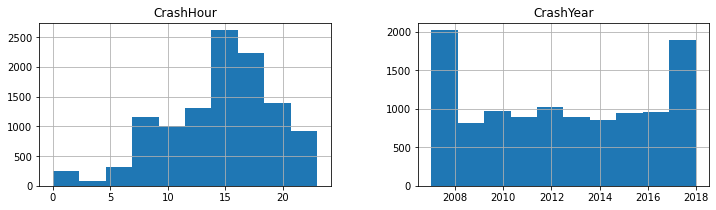

In [8]:
bike_crash[['CrashHour', 'CrashYear']].hist(figsize = (12,3))
plt.subplots_adjust(hspace = 0.5)

Was toying around with plotting categorical data...

In [9]:
# nrow = 12
# ncol = 5
# f_size = (15, 40)

# fig, axes = plt.subplots(nrow, ncol, figsize = f_size, squeeze=False)
# fig.subplots_adjust(wspace=0.5, hspace=0.6)

# for i, column in enumerate(bike_crash.select_dtypes('object').columns):
#     ax = axes.flatten()[i]
#     ax.bar(x = bike_crash[column].value_counts().index, 
#            height = bike_crash[column].value_counts().values)
    
# nsubplots = nrow * ncol    
# for empty in range(i+1, nsubplots):
#     axes.flatten()[empty].set_visible(False)

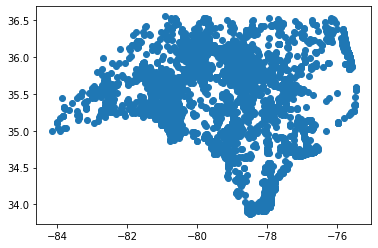

In [75]:
plt.scatter(x = bike_crash['X'], y = bike_crash['Y'])


All geo values appear to be within sensible bounds (the plot clearly shows the shape of North Carolina)


In [77]:
ch_bike = bike_crash['City'] == 'Chapel Hill'
ch_ped = ped_crash['City'] == 'Chapel Hill'

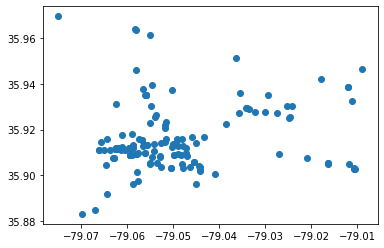

In [79]:
plt.scatter(x = bike_crash[ch_bike]['X'], y = bike_crash[ch_bike]['Y'])

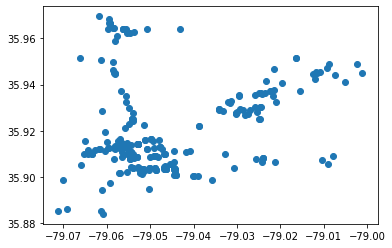

In [81]:
plt.scatter(x = ped_crash[ch_ped]['X'], y = ped_crash[ch_ped]['Y'])

The geographic distributions of the pedestrian and bike crashes have some similarities, which isn't too surprising. One important thing to consider with any type of geo map based on human activity is to make sure it isn't just a population heat map...

**Fundamental Questions (From Guided Capstone)**  
Do you think you may have the data you need to tackle the desired question?  
Have you identified the required target value?  
Do you have potentially useful features?  
Do you have any fundamental issues with the data?

## Do You think you have the data to tackle the desired question?  

In [78]:

print(f"Bike Data Size: {len(bike_crash[ch_bike])} \nPed Data Size: {len(bike_crash[ch_ped])}")

Bike Data Size: 142 
Ped Data Size: 95


<ipython-input-78-943066b3e52f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Bike Data Size: {len(bike_crash[ch_bike])} \nPed Data Size: {len(bike_crash[ch_ped])}")


In [11]:
print(ch_bike['CrashYear'].value_counts(sort = False))
print()
print(ch_ped['CrashYear'].value_counts(sort = False))

2007     6
2008    22
2009    13
2010    17
2011    12
2012    15
2013     9
2014     5
2015    12
2016     8
2017    12
2018    11
Name: CrashYear, dtype: int64

2007    30
2008    15
2009    22
2010    19
2011    18
2012    26
2013    18
2014    23
2015    17
2016    20
2017    29
2018    35
Name: CrashYear, dtype: int64


Checking out county data for CH's County

In [12]:
bike_crash[bike_crash['City'] == 'Chapel Hill']['County'].unique()

array(['Orange'], dtype=object)

In [13]:
print(bike_crash[bike_crash['County'] == 'Orange']['CrashYear'].value_counts(sort = False))
print(bike_crash[bike_crash['County'] == 'Orange']['CrashYear'].value_counts().sum())

2007    12
2008    34
2009    20
2010    23
2011    20
2012    30
2013    23
2014    10
2015    22
2016    16
2017    29
2018    19
Name: CrashYear, dtype: int64
258


In [47]:
severe_injury = ['A: Suspected Serious Injury', 'K: Killed']

bike = bike_crash['BikeInjury'].isin(severe_injury)
drive = bike_crash['DrvrInjury'].isin(severe_injury)
chap = bike_crash['City'] == 'Chapel Hill'

# print("-----\nONE ARG\n------")
# stat_compare(bike_crash, [bike], 'City', 'Chapel Hill', ['BikeInjury'])
# print("-----\nTWO ARGS\n------")
# stat_compare(bike_crash, [bike, drive], 'City', 'Chapel Hill', ['BikeInjury', 'DrvrInjury'])

print(f"All Data Bike Injuries: \n{bike_crash[bike]['BikeInjury'].value_counts()}\n")
print(f"Chapel Hill Bike Injuries:\n{bike_crash[bike&chap]['BikeInjury'].value_counts()}\n")
print(f"All Data Driver Injuries: \n{bike_crash[drive]['DrvrInjury'].value_counts()}\n")
print(f"Chape Hill Driver Injuries:\n{bike_crash[drive&chap]['DrvrInjury'].value_counts()}\n")

All Data Bike Injuries: 
A: Suspected Serious Injury    577
K: Killed                      250
Name: BikeInjury, dtype: int64

Chapel Hill Bike Injuries:
A: Suspected Serious Injury    3
K: Killed                      1
Name: BikeInjury, dtype: int64

All Data Driver Injuries: 
A: Suspected Serious Injury    10
K: Killed                       2
Name: DrvrInjury, dtype: int64

Chape Hill Driver Injuries:
Series([], Name: DrvrInjury, dtype: int64)



It looks like there are a sufficiet number of severe incidents in the set at large and only a handfull of severe incidents from Chapel Hil specifically. Of the 400 or so reported incidents in both ped and bike data sets, only 4 had confirmed severe injuries.

There may be an increase in hte number of pedestrian accidents in recent years, but the bike accidents seem to be somewhat flat (in Chapel Hill).

In [56]:
x = bike_crash[bike]['SpeedLimit'].value_counts()
x/(x.sum())

50 - 55  MPH    0.330109
40 - 45  MPH    0.282950
30 - 35  MPH    0.264813
20 - 25  MPH    0.087062
Unknown         0.016929
5 - 15 MPH      0.009674
60 - 75 MPH     0.008464
Name: SpeedLimit, dtype: float64

In [57]:
x = bike_crash['SpeedLimit'].value_counts()
x/(x.sum())

30 - 35  MPH    0.398367
40 - 45  MPH    0.213740
20 - 25  MPH    0.165720
50 - 55  MPH    0.113439
5 - 15 MPH      0.056276
Unknown         0.049885
60 - 75 MPH     0.002574
Name: SpeedLimit, dtype: float64

Unsurprisingly, faster speed limits are correlated with more severe injuries. One thing to keep in mind though is how often do high speed limit roads coincide with cyclists? Are there designated bike lanes?

In [72]:
local = bike_crash['RdClass'] == 'Local Street'
ushw = bike_crash['RdClass'] == 'US Route'
nchw = bike_crash['RdClass'] == 'NC Route'
x = bike_crash[local][bike]['SpeedLimit'].value_counts()
y = bike_crash[ushw][bike]['SpeedLimit'].value_counts()
z = bike_crash[nchw][bike]['SpeedLimit'].value_counts()
print(f"{x/x.sum()}\n")
print(f"{y/y.sum()}\n")
print(f"{z/z.sum()}\n")

30 - 35  MPH    0.496795
40 - 45  MPH    0.275641
20 - 25  MPH    0.185897
50 - 55  MPH    0.032051
5 - 15 MPH      0.006410
Unknown         0.003205
Name: SpeedLimit, dtype: float64

50 - 55  MPH    0.581818
40 - 45  MPH    0.272727
30 - 35  MPH    0.081818
60 - 75 MPH     0.036364
20 - 25  MPH    0.018182
Unknown         0.009091
Name: SpeedLimit, dtype: float64

50 - 55  MPH    0.591241
40 - 45  MPH    0.284672
30 - 35  MPH    0.109489
60 - 75 MPH     0.007299
20 - 25  MPH    0.007299
Name: SpeedLimit, dtype: float64



<ipython-input-72-725eb0a14c19>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = bike_crash[local][bike]['SpeedLimit'].value_counts()
<ipython-input-72-725eb0a14c19>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = bike_crash[ushw][bike]['SpeedLimit'].value_counts()
<ipython-input-72-725eb0a14c19>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z = bike_crash[nchw][bike]['SpeedLimit'].value_counts()


The US and NC Routes look to have similar distributions of severe injuries in speed limit groups, but it would also be nice to be able to verify that these road systems have a similar distribution of speed limits. In general, the distribution/numbers are less useful without the context of how prevelant each speed limit is or how much road those speed limit groups cover.

It seems promising that there should be enough data here to tackle the desired questions.

## Have you identified the required target value?

We can definitely see that there are hotspots for crashes within the Chapel Hill area, but are these spots just hot because of population density? Compared to nearby areas or NC at large, are these spots more or less eventful than would be predicted? Are the events here different (in severity, frequency, etc.) than nearby regions or NC at large?

## Do you have potentially useful features?

Yes. There are plenty of useful fields that could provide interesting insights.


## Do you see any problem with the Data?

There are unknown fields with custom NA values. They should all be identified and replaced with nulls.


In [87]:
object_summary(bike_crash, n = 20)

AmbulanceR
Yes    7656
No     3610
Name: AmbulanceR, dtype: int64

BikeAge
20     354
18     322
14     321
15     314
21     295
22     289
16     286
19     281
17     272
13     258
12     256
23     247
25     221
24     207
26     206
51     202
999    196
52     191
28     187
48     186
Name: BikeAge, dtype: int64

BikeAgeGrp
50-59      1599
40-49      1588
20-24      1392
30-39      1327
11-15      1320
16-19      1161
25-29       955
6-10        736
60-69       697
Unknown     196
70+         185
0-5         110
Name: BikeAgeGrp, dtype: int64

BikeAlcDrg
No                                             7493
.                                              2830
Yes-Alcohol, impairment suspected               357
Missing                                         253
Unknown                                         233
Yes-Alcohol, impairment detected                 57
Yes-Alcohol and Drugs, impairment suspected      20
Yes-Drugs, impairment suspected                  15
Yes-Alcohol an

Name: NumBicsBin, dtype: int64

NumBicsCin
.    6669
0    2846
1    1739
2      12
Name: NumBicsCin, dtype: int64

NumBicsKil
.    6669
0    4492
1     105
Name: NumBicsKil, dtype: int64

NumBicsNoi
.    6668
0    4116
1     477
2       5
Name: NumBicsNoi, dtype: int64

NumBicsTot
.    6668
1    4537
2      56
3       4
4       1
Name: NumBicsTot, dtype: int64

NumBicsUin
.    6669
0    4444
1     153
Name: NumBicsUin, dtype: int64

NumLanes
2 lanes            6343
4 lanes            1682
5 lanes            1005
3 lanes             806
Unknown             662
6 lanes             288
1 lane              215
7 lanes             127
8 lanes              76
9 or more lanes      62
Name: NumLanes, dtype: int64

RdCharacte
Straight - Level        8523
Straight - Grade        1525
Straight - Hillcrest     396
Curve - Level            319
Curve - Grade            211
Straight - Bottom        137
Curve - Hillcrest         56
Missing                   51
Curve - Bottom            22
Unknown     

**Values from DataSet that are equivalent to "Unknown"**

'Missing', 'missing', '.', 'Unknown/Missing', 'Unknown Injury', 'Unknown Location', 'Other/Unknown—Insufficient Details', '999', 'Unknown'

In [158]:
to_be_nulled = ['Missing', 'missing', '.', 'Unknown/Missing', 'Unknown Injury', 
                'Unknown Location', 'Other/Unknown—Insufficient Details', '999', 'Unknown', 999]

df = bike_crash.copy()
df.drop(columns = ['NumBicsAin', 'NumBicsBin', 'NumBicsCin',
                   'NumBicsKil', 'NumBicsNoi', 'NumBicsTot', 'NumBicsUin'], inplace = True)

for column in df.columns:
    unknown_values = df[column].isin(to_be_nulled)
    df.loc[unknown_values, column] = np.nan

nulled_bike_crash = df.copy()
object_summary(nulled_bike_crash, n = 25)


AmbulanceR
Yes    7656
No     3610
Name: AmbulanceR, dtype: int64

BikeAge
20    354
18    322
14    321
15    314
21    295
22    289
16    286
19    281
17    272
13    258
12    256
23    247
25    221
24    207
26    206
51    202
52    191
28    187
48    186
53    184
30    183
49    179
27    175
10    173
47    171
Name: BikeAge, dtype: int64

BikeAgeGrp
50-59    1599
40-49    1588
20-24    1392
30-39    1327
11-15    1320
16-19    1161
25-29     955
6-10      736
60-69     697
70+       185
0-5       110
Name: BikeAgeGrp, dtype: int64

BikeAlcDrg
No                                             7493
Yes-Alcohol, impairment suspected               357
Yes-Alcohol, impairment detected                 57
Yes-Alcohol and Drugs, impairment suspected      20
Yes-Drugs, impairment suspected                  15
Yes-Alcohol and Drugs, impairment detected        6
Yes-Drugs, impairment detected                    2
Name: BikeAlcDrg, dtype: int64

BikeAlcFlg
No     10115
Yes      648
Name:

Name: SpeedLimit, dtype: int64

TraffCntrl
No Control Present                     5152
Stop Sign                              2341
Stop And Go Signal                     2041
Double Yellow Line, No Passing Zone    1372
Yield Sign                               66
Other                                    50
Flashing Stop And Go Signal              34
Flashing Signal With Stop Sign           23
Human Control                            13
Flashing Signal Without Stop Sign         9
Warning Sign                              4
School Zone Signs                         4
RR Gate And Flasher                       4
Name: TraffCntrl, dtype: int64

Weather
Clear                                       9286
Cloudy                                      1438
Rain                                         484
Fog, Smog, Smoke                              24
Other                                         19
Snow, Sleet, Hail, Freezing Rain/Drizzle      15
Name: Weather, dtype: int64

Workzone
No     11212


In [159]:
df = ped_crash.copy()
df.drop(columns = ['NumPedsAin', 'NumPedsBin', 'NumPedsCin',
                   'NumPedsKil', 'NumPedsNoi', 'NumPedsTot', 'NumPedsUin'], inplace = True)

for column in df.columns:
    unknown_values = df[column].isin(to_be_nulled)
    df.loc[unknown_values, column] = np.nan

nulled_ped_crash = df.copy()
object_summary(nulled_ped_crash, n = 25)
    

AmbulanceR
Yes    24223
No      9484
Name: AmbulanceR, dtype: int64

City
None - Rural Crash    6680
Charlotte             5325
Raleigh               2584
Greensboro            1823
Durham                1630
Fayetteville          1188
Asheville              851
Winston-Salem          850
Wilmington             768
High Point             513
Gastonia               510
Greenville             408
Rocky Mount            349
Cary                   326
Hickory                287
Concord                282
Jacksonville           282
Chapel Hill            272
Burlington             260
Wilson                 242
Asheboro               224
Salisbury              208
Goldsboro              206
Lumberton              177
Kannapolis             176
Name: City, dtype: int64

County
Mecklenburg    5777
Wake           3647
Guilford       2527
Durham         1690
Cumberland     1517
Forsyth        1125
Buncombe       1102
New Hanover    1035
Gaston          827
Pitt            577
Onslow          55

Name: RuralUrban, dtype: int64

SpeedLimit
30 - 35  MPH    10544
40 - 45  MPH     5579
5 - 15 MPH       5544
20 - 25  MPH     4611
50 - 55  MPH     3137
60 - 75 MPH       635
Name: SpeedLimit, dtype: int64

TraffCntrl
No Control Present                     23024
Stop And Go Signal                      4276
Double Yellow Line, No Passing Zone     3280
Stop Sign                               2153
Human Control                            336
Other                                    267
Yield Sign                               100
Flashing Stop And Go Signal               85
Warning Sign                              49
Flashing Signal Without Stop Sign         43
Flashing Signal With Stop Sign            42
School Zone Signs                         42
RR Gate And Flasher                        8
RR Crossbucks Only                         1
RR Flasher                                 1
Name: TraffCntrl, dtype: int64

Weather
Clear                                       26037
Cloudy           

**The Data have now been properly filled with nulls and will be exported**

In [161]:
nulled_bike_crash.to_csv('nulled_bike_crash.csv')
nulled_ped_crash.to_csv('nulled_ped_crash.csv')